In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Question 1

Posterior inference: suppose you have a Beta(4, 4) prior distribution on the probability θ that a coin will yield a ‘head’ when spun in a specified manner. The coin is independently spun ten times, and ‘heads’ appear fewer than 3 times. You are not told how many heads were seen, only that the number is less than 3. Calculate your exact posterior density (up to a proportionality constant) for θ and sketch it

In [5]:
#prior
alpha_pr=4
beta_pr=4
#thetas
x = np.linspace(0.0, 1.0, 1000)
pdu = stats.beta.pdf(x, alpha_pr, beta_pr)
pdu=pdu/pdu.sum()

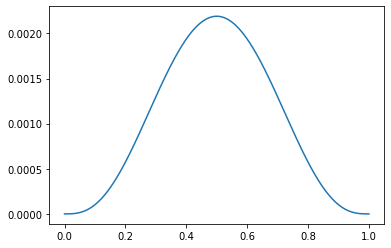

In [6]:
plt.plot(x, pdu)

Prior density: p(θ) ∝ θ^3(1 − θ)^3. (alpha-1 and beta -1)

Likelihood: Pr(data|θ) = fac(10 0 ) (1 − θ)^10 + fac(10 1 ) θ(1 − θ)^9 + fac(10 2 ) θ2(1 − θ)^8 = (1 − θ)^10 + 10θ(1 − θ)^9 + 45θ^2(1 − θ)^8.

Posterior density: p(θ|data) ∝ θ^3(1 − θ)^13 + 10θ^4(1 − θ)^12 + 45θ^5(1 − θ)^11

In [12]:
# plot posterior
post_dens=(x**3)*(1-x)**13 + 10*x**4*(1-x)**12 + 45*x**5*(1-x)**11

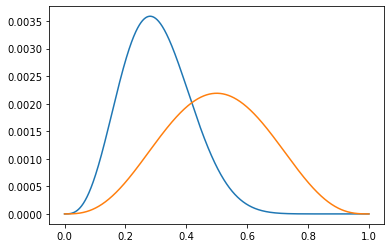

In [20]:
plt.plot(x, post_dens)
plt.plot(x, pdu)

In [22]:
#most probable theta value
x[post_dens.argmax()]

0.28128128128128127

## Question 2

Predictive distributions: consider two coins, C1 and C2, with the following characteristics: Pr(heads|C1)=0.6 and Pr(heads|C2)=0.4. Choose one of the coins at random and imagine spinning it repeatedly. Given that the first two spins from the chosen coin are tails, what is the expectation of the number of additional spins until a head shows up

In [23]:
theta1=0.6
theta2=0.4

In [42]:
data=[0, 0]

In [33]:
#probabilty that first/second coin was chosen
p_coose=0.5
#probability of coin 1 given that we have two tails
#p(c=c1|TT)=(p(c==c1)p(TT|c=c1))/((p(c==c1)p(TT|c=c1))+(p(c==c2)p(TT|c=c2)))
p1=(0.5*(1-theta1)**2)/((0.5*(1-theta1)**2)+(0.5*(1-theta2)**2))
p1

0.30769230769230776

In [34]:
p2=(0.5*(1-theta2)**2)/((0.5*(1-theta1)**2)+(0.5*(1-theta2)**2))
p2

0.6923076923076923

In [40]:
waiting_time1=1/theta1
waiting_time2=1/theta2
waiting_time1, waiting_time2

(1.6666666666666667, 2.5)

In [41]:
p1*waiting_time1+p2*waiting_time2

2.2435897435897436

## Question 3

3. Predictive distributions: let y be the number of 6’s in 1000 rolls of a fair die. 

(a) Sketch the approximate distribution of y, based on the normal approximation. 

(b) Using the normal distribution table, give approximate 5%, 25%, 50%, 75%, and 95% points for the distribution of y.

In [4]:
mean=1/6
n=1000

x = np.linspace(0.0, 1.0, 1000)
pdu = stats.beta.pdf(x, n*mean, n*(1-mean))
#pdu=pdu/pdu.sum()

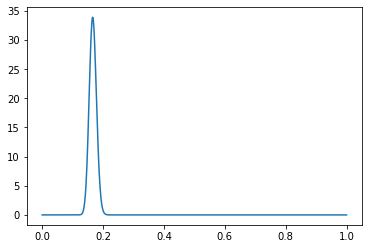

In [5]:
plt.plot(x, pdu)

In [14]:
#take 1000 samples iteratively - this involves randomness!
samples=[stats.beta.rvs(n*mean, n*(1-mean)) for _ in range(n)]

In [25]:
np.mean(samples)*n

167.23729466386402

In [26]:
np.std(samples)*n

11.561793685451926

In [17]:
#exact calculations
#expected mean
exp_mean=n*1/6
np.round(exp_mean, 3)

166.667

In [18]:
#standard deviaton
exp_std=np.sqrt(n*(1/6)*(5/6))
np.round(exp_std, 3)

11.785

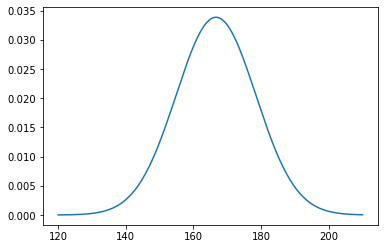

In [24]:
x=np.linspace(120, 210, 1000)
dens=stats.norm(exp_mean, exp_std).pdf(x)
plt.plot(x, dens)

In [34]:
#approximate 5%, 25%, 50%, 75%, and 95% points for the distribution
#95%
exp95=exp_mean+1.65*exp_std
#75%
exp75=exp_mean+0.67*exp_std
#50%
exp50=exp_mean
#25
exp25=exp_mean-0.67*exp_std
#5%
exp5=exp_mean-1.65*exp_std

exp95, exp75, exp50, exp25, exp5

(186.11210314929673,
 174.56269238991644,
 166.66666666666666,
 158.77064094341688,
 147.22123018403659)

## Question 4

Predictive distributions: let y be the number of 6’s in 1000 independent rolls of a particular real die, which may be unfair. Let θ be the probability that the die lands on ‘6.’ Suppose your prior distribution for θ is as follows: 

Pr(θ =1/12) = 0.25, 

Pr(θ =1/6) = 0.5, 

Pr(θ =1/4) = 0.25.

Using the normal approximation for the conditional distributions, p(y|θ), sketch your approximate prior predictive distribution for y.

In [38]:
n=1000
mean1=1/12*n
mean2=1/6*n
mean3=1/4*n
mean1, mean2, mean3

(83.33333333333333, 166.66666666666666, 250.0)

In [42]:
std1=np.sqrt(n*(1/12)*(1-1/12))
std2=np.sqrt(n*(1/6)*(1-1/6))
std3=np.sqrt(n*(1/4)*(1-1/4))
std1, std2, std3

(8.740073734751263, 11.785113019775793, 13.693063937629153)

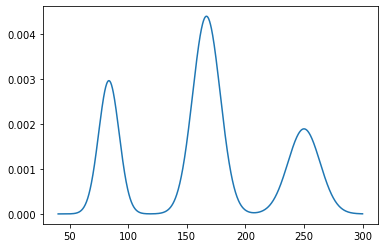

In [45]:
x=np.linspace(40, 300, 1000)
dens1=stats.norm(mean1, std1).pdf(x)
dens2=stats.norm(mean2, std2).pdf(x)
dens3=stats.norm(mean3, std3).pdf(x)
dens_mix=0.25*dens1+0.5*dens2+0.25*dens3
dens_mix=dens_mix/dens_mix.sum()
plt.plot(x, dens_mix)